<a href="https://colab.research.google.com/github/ssudheerrao/test/blob/master/used%20cars%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#### Importing required libraries and algorithms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io

from sklearn.feature_selection import SelectKBest, chi2, f_classif, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer


In [4]:
from google.colab import files
uploaded=files.upload()

Saving test.csv to test.csv
Saving training.csv to training.csv


In [5]:
train = pd.read_csv(io.BytesIO(uploaded['training.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test.head()
train.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


# Explaratory data analysis

In [6]:
train.shape,  test.shape

((72983, 34), (48707, 33))

In [7]:
train.IsBadBuy.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

In [8]:
train.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [9]:
train[train.isnull().any(axis=1)]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,WheelType,VehOdo,Nationality,Size,TopThreeAmericanName,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,AUTO,1.0,Alloy,89046,OTHER ASIAN,MEDIUM,OTHER,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,AUTO,1.0,Alloy,93593,AMERICAN,LARGE TRUCK,CHRYSLER,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,AUTO,2.0,Covers,73807,AMERICAN,MEDIUM,CHRYSLER,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,AUTO,1.0,Alloy,65617,AMERICAN,COMPACT,CHRYSLER,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,MANUAL,2.0,Covers,69367,AMERICAN,COMPACT,FORD,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,BLACK,AUTO,1.0,Alloy,45234,AMERICAN,MEDIUM,FORD,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,SILVER,AUTO,NaN,NaN,71759,AMERICAN,MEDIUM,GM,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,SILVER,AUTO,1.0,Alloy,88500,AMERICAN,MEDIUM SUV,CHRYSLER,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,WHITE,AUTO,1.0,Alloy,79554,AMERICAN,LARGE,GM,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


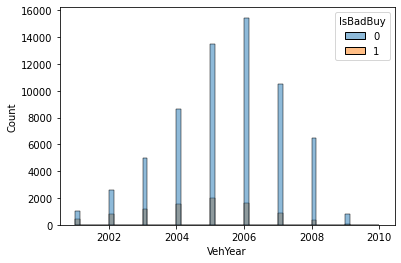

In [10]:
# manufacture year of the vechicles
sns.histplot(data=train, x="VehYear", hue='IsBadBuy');

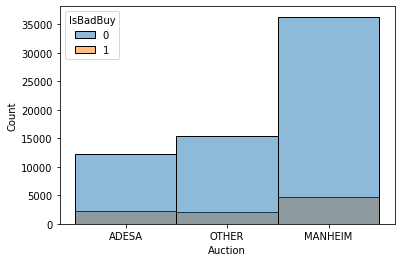

In [32]:
# Checking auction feature
sns.histplot(data=train, x="Auction", hue='IsBadBuy');

In [33]:
# number of makers
train.Make.value_counts().head(10)

CHEVROLET    17248
DODGE        12912
FORD         11305
CHRYSLER      8844
PONTIAC       4258
KIA           2484
SATURN        2163
NISSAN        2085
HYUNDAI       1811
JEEP          1644
Name: Make, dtype: int64

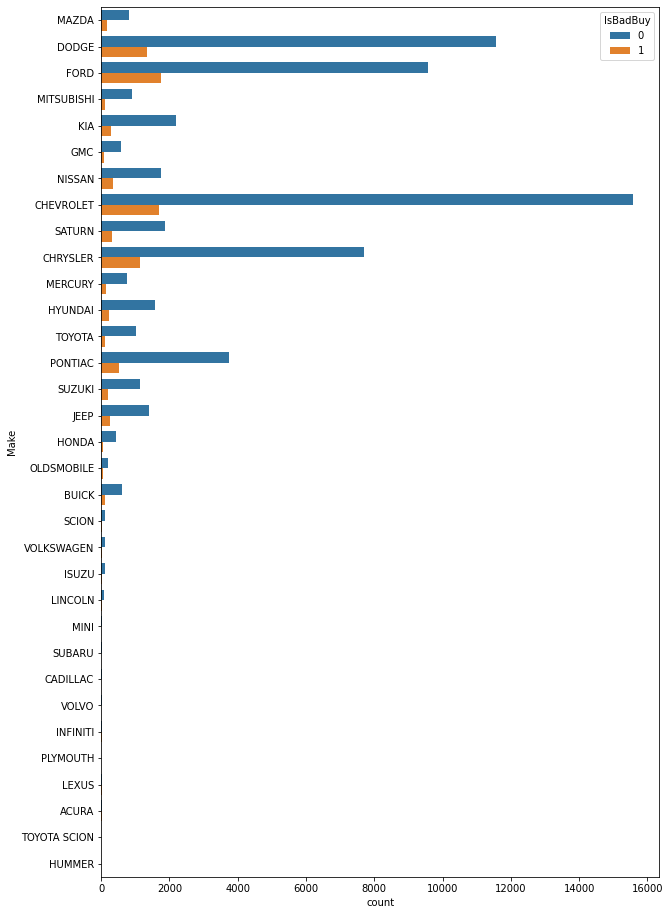

In [11]:
# Impact of makers of the vehicle
fig, ax = plt.subplots(figsize=(10,16))
sns.countplot(y="Make", data=train, hue='IsBadBuy')
plt.show()

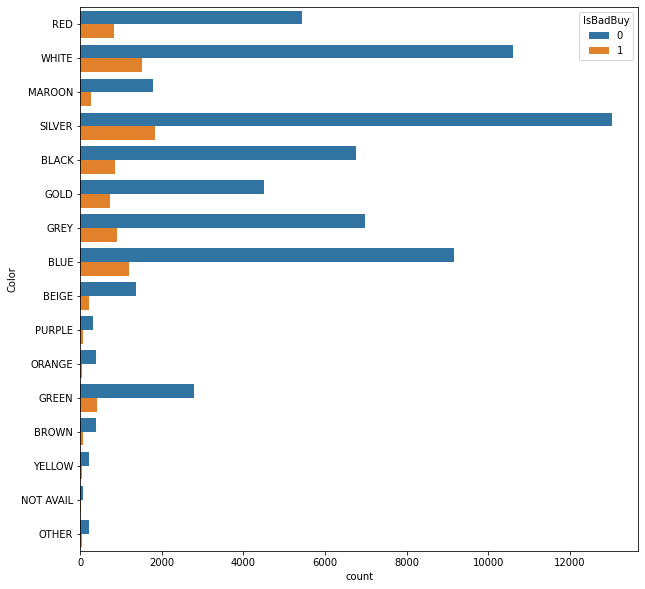

In [37]:
# Impact of color of the vehicle
fig, ax = plt.subplots(figsize=(10,10))
sns.countplot(y="Color", data=train, hue='IsBadBuy')
plt.show()

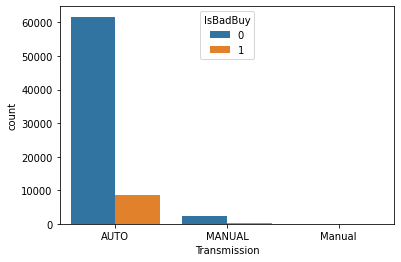

In [38]:
# Impact of Transmission
sns.countplot(x="Transmission", data=train, hue='IsBadBuy');

# Feature Engineering

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   RefId                              72983 non-null  int64  
 1   IsBadBuy                           72983 non-null  int64  
 2   PurchDate                          72983 non-null  object 
 3   Auction                            72983 non-null  object 
 4   VehYear                            72983 non-null  int64  
 5   VehicleAge                         72983 non-null  int64  
 6   Make                               72983 non-null  object 
 7   Model                              72983 non-null  object 
 8   Trim                               70623 non-null  object 
 9   SubModel                           72975 non-null  object 
 10  Color                              72975 non-null  object 
 11  Transmission                       72974 non-null  obj

In [40]:
print(train.isnull().sum())
print(test.isnull().sum())

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [13]:
print(train[train.duplicated()])
print(test[test.duplicated()])

Empty DataFrame
Columns: [RefId, IsBadBuy, PurchDate, Auction, VehYear, VehicleAge, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, VehOdo, Nationality, Size, TopThreeAmericanName, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, PRIMEUNIT, AUCGUART, BYRNO, VNZIP1, VNST, VehBCost, IsOnlineSale, WarrantyCost]
Index: []
Empty DataFrame
Columns: [RefId, PurchDate, Auction, VehYear, VehicleAge, Make, Model, Trim, SubModel, Color, Transmission, WheelTypeID, WheelType, VehOdo, Nationality, Size, TopThreeAmericanName, MMRAcquisitionAuctionAveragePrice, MMRAcquisitionAuctionCleanPrice, MMRAcquisitionRetailAveragePrice, MMRAcquisitonRetailCleanPrice, MMRCurrentAuctionAveragePrice, MMRCurrentAuctionCleanPrice, MMRCurrentRetailAveragePrice, MMRCurrentRetailCleanPrice, PRIM

In [14]:
def split_date(df):
  df['PurchDate'] = pd.to_datetime(df['PurchDate'])
  df['Year'] = df.PurchDate.dt.year

In [16]:
def MeanOnFeatures(df):
  df['mean_MMRCurrentAuctionAveragePrice_Make']=train.groupby(['Make'])['MMRCurrentAuctionAveragePrice'].transform('mean')
  df['mean_MMRCurrentAuctionAveragePrice_Model']=train.groupby(['Model'])['MMRCurrentAuctionAveragePrice'].transform('mean')
  df['mean_MMRCurrentAuctionAveragePrice_Trim']=train.groupby(['Trim'])['MMRCurrentAuctionAveragePrice'].transform('mean')
  df['mean_MMRCurrentAuctionAveragePrice_SubModel']=train.groupby(['SubModel'])['MMRCurrentAuctionAveragePrice'].transform('mean')
  df['mean_MMRCurrentAuctionAveragePrice_Color']=train.groupby(['Color'])['MMRCurrentAuctionAveragePrice'].transform('mean')
  df['mean_MMRCurrentAuctionAveragePrice_Transmission']=train.groupby(['Transmission'])['MMRCurrentAuctionAveragePrice'].transform('mean')

In [15]:
print(train.shape, test.shape)

(72983, 34) (48707, 33)


In [17]:
split_date(train)
split_date(test)

MeanOnFeatures(train)
MeanOnFeatures(test)

print(train.shape, test.shape)


(72983, 41) (48707, 40)


In [18]:
not_relevant_coulmns = ["PurchDate", "WheelTypeID", "Model", "Trim", "SubModel", "VNZIP1", "VNST", "Make", "Color"]

def remove_features(df):
  df.drop(not_relevant_coulmns, axis=1, inplace=True)

remove_features(train)
remove_features(test)
print(train.shape, test.shape)

(72983, 32) (48707, 31)


In [19]:
# checking Missing values
train.isnull().sum()

RefId                                                  0
IsBadBuy                                               0
Auction                                                0
VehYear                                                0
VehicleAge                                             0
Transmission                                           9
WheelType                                           3174
VehOdo                                                 0
Nationality                                            5
Size                                                   5
TopThreeAmericanName                                   5
MMRAcquisitionAuctionAveragePrice                     18
MMRAcquisitionAuctionCleanPrice                       18
MMRAcquisitionRetailAveragePrice                      18
MMRAcquisitonRetailCleanPrice                         18
MMRCurrentAuctionAveragePrice                        315
MMRCurrentAuctionCleanPrice                          315
MMRCurrentRetailAveragePrice   

In [20]:
train.Transmission.value_counts()

AUTO      70398
MANUAL     2575
Manual        1
Name: Transmission, dtype: int64

In [21]:
train["Transmission"].replace("Manual", "MANUAL", inplace=True)

In [22]:
# Imbalance target feature
train.IsBadBuy.value_counts()

0    64007
1     8976
Name: IsBadBuy, dtype: int64

(8976, 32)
(64007, 32)
1    64007
0    64007
Name: IsBadBuy, dtype: int64


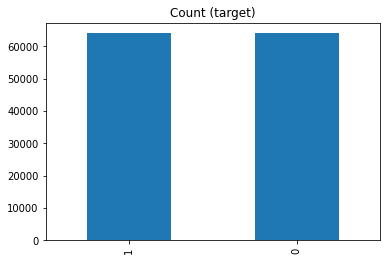

In [23]:
count_class_0, count_class_1 = train.IsBadBuy.value_counts()

df_class_0 = train[train['IsBadBuy'] == 0]
df_class_1 = train[train['IsBadBuy'] == 1]

print(df_class_1.shape)

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print(df_class_1_over.shape)
print(df_test_over.IsBadBuy.value_counts())

df_test_over.IsBadBuy.value_counts().plot(kind='bar', title='Count (target)');

### Handling missing values and Catagorical features

In [24]:
#create X and y datasets for splitting 
X = df_test_over.drop(["RefId",'IsBadBuy'], axis=1)
y = df_test_over['IsBadBuy']

In [25]:
all_features = X.columns
all_features = all_features.tolist()
numerical_features = [c for c, dtype in zip(X.columns, X.dtypes)
                     if dtype.kind in ['i','f']]
categorical_features = [c for c, dtype in zip(X.columns, X.dtypes)
                     if dtype.kind not in ['i','f']]
                     

In [26]:
#import train_test_split library
from sklearn.model_selection import train_test_split
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.3, random_state=42) 

In [27]:
preprocessor = make_column_transformer(
    (make_pipeline(
    SimpleImputer(strategy = 'median'),
    # KNNImputer(n_neighbors=2, weights="uniform"),
    MinMaxScaler()), numerical_features),
    
    (make_pipeline(
    SimpleImputer(strategy = 'constant', fill_value = 'missing'),
    OneHotEncoder(categories = 'auto', handle_unknown = 'ignore')), categorical_features),
)

In [28]:
preprocessor_best = make_pipeline(preprocessor, 
                                  VarianceThreshold(), 
                                  SelectKBest(f_classif, k = 50)
                                 )

### Implementing Random forest

In [29]:
RF_Model = make_pipeline(preprocessor_best, RandomForestClassifier(n_estimators = 100))
RF_Model.fit(X_train, y_train)
RF_Model.score(X_train, y_train)

1.0

In [30]:
RF_Model.score(X_test, y_test)

0.9841687280302044

In [31]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 19)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#Maximum number of levels in tree
max_depth = [2,4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [32]:
# Create the param grid
param_grid = {'randomforestclassifier__n_estimators': n_estimators,
               'randomforestclassifier__max_features': max_features,
               'randomforestclassifier__max_depth': max_depth,
               'randomforestclassifier__min_samples_split': min_samples_split,
               'randomforestclassifier__min_samples_leaf': min_samples_leaf,
               'randomforestclassifier__bootstrap': bootstrap
             }
print(param_grid)

{'randomforestclassifier__n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000], 'randomforestclassifier__max_features': ['auto', 'sqrt'], 'randomforestclassifier__max_depth': [2, 4, 6, 8], 'randomforestclassifier__min_samples_split': [2, 5], 'randomforestclassifier__min_samples_leaf': [1, 2], 'randomforestclassifier__bootstrap': [True, False]}


In [33]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = RF_Model, param_distributions = param_grid, cv = 3, verbose=1, n_jobs = -1, n_iter = 5, scoring = 'f1')

In [34]:
rf_RandomGrid.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  8.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('pipeline',
                                              Pipeline(memory=None,
                                                       steps=[('columntransformer',
                                                               ColumnTransformer(n_jobs=None,
                                                                                 remainder='drop',
                                                                                 sparse_threshold=0.3,
                                                                                 transformer_weights=None,
                                                                                 transformers=[('pipeline-1',
                                                                                                Pipeline(memory=None,
                                                                  

In [35]:
rf_RandomGrid.score(X_train, y_train)

0.7011408992970929

In [36]:
rf_RandomGrid.score(X_test, y_test)

0.6870060244293372

In [37]:
rf_RandomGrid.best_estimator_

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('columntransformer',
                                  ColumnTransformer(n_jobs=None,
                                                    remainder='drop',
                                                    sparse_threshold=0.3,
                                                    transformer_weights=None,
                                                    transformers=[('pipeline-1',
                                                                   Pipeline(memory=None,
                                                                            steps=[('simpleimputer',
                                                                                    SimpleImputer(add_indicator=False,
                                                                                                  copy=True,
                                                                     

In [38]:
print(f'Train : {rf_RandomGrid.score(X_train, y_train):.3f}')
print(f'Test : {rf_RandomGrid.score(X_test, y_test):.3f}')

Train : 0.701
Test : 0.687


In [43]:
y_pred= rf_RandomGrid.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [46]:
from sklearn.metrics import roc_curve, auc,precision_score,recall_score,f1_score
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('roc_auc',roc_auc)
print('precision',precision_score(y_test,y_pred))
print('recall',recall_score(y_test,y_pred))
print('f1_score',f1_score(y_test,y_pred))

roc_auc 0.7048633548317018
precision 0.7284768211920529
recall 0.6500026146525126
f1_score 0.6870060244293372
